## Final Project Submission

Please fill out:
* Student name: Raffette Alston
* Student pace: Part-time
* Scheduled project review date/time: June 13/3pm EST 
* Instructor name: James Irving, PhD
* Blog post URL:https://raffettealston.github.io/data_visualization_a_beginners_perspective


# Introduction
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating. 


### Questions to Ask
- Which studios produced the movies with the highest gross from 2010-present?
    - Domestic gross 
    - Worldwide gross
- What are the top 10 grossing genres and how much did each genre gross?
    - Domestic gross
    - Worldwide gross
- What movies had the largest production budgets from 2010-present?
- Which movies  had the highest gross from 2010-present?
    - Domestic gross
    - Worldwide gross



# Import Libraries and Data

In [2]:
%ls

CONTRIBUTING.md             module1_project_rubric.pdf
LICENSE.md                  output_37_0.png
README.md                   student.ipynb
Untitled.ipynb              zippedData/
awesome.gif


In [3]:
import os
os.listdir("zippedData/")

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [4]:
import glob
file_list = glob.glob("zippedData/*")
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
DATA = {}
for file in file_list:
    key = file.split('/')[-1]
    print(key)
    
    try:
        df = pd.read_csv(file)
    except:
        df = pd.read_csv(file, sep='\t',encoding='latin-1')
    
    DATA[key] = df

imdb.title.crew.csv.gz
tmdb.movies.csv.gz
imdb.title.akas.csv.gz
imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz
rt.reviews.tsv.gz
imdb.title.basics.csv.gz
rt.movie_info.tsv.gz
tn.movie_budgets.csv.gz
bom.movie_gross.csv.gz
imdb.title.principals.csv.gz


In [7]:
for filename, df in DATA.items():
    print(filename)
    display(df.head())
    print()

imdb.title.crew.csv.gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



tmdb.movies.csv.gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



imdb.title.akas.csv.gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



imdb.title.ratings.csv.gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



imdb.name.basics.csv.gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



rt.reviews.tsv.gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"



imdb.title.basics.csv.gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



rt.movie_info.tsv.gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN



tn.movie_budgets.csv.gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



bom.movie_gross.csv.gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



imdb.title.principals.csv.gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


# Explore Data

In [8]:
#Explore head of dataset
df0 = pd.read_csv(file_list[0])
df0.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [9]:
#Explore head of dataset
df1 = pd.read_csv(file_list[1])
df1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
#Explore head of dataset
df2 = pd.read_csv(file_list[2])
df2.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [11]:
#Explore head of dataset
df3 = pd.read_csv(file_list[3]).sort_values(by = 'averagerating', ascending = False)
df3.head()

,tconst,averagerating,numvotes
27644,tt8730716,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
65033,tt9715646,10.0,20
57679,tt5344358,10.0,6


In [12]:
#Explore head of dataset
df4 = pd.read_csv(file_list[4])
df4.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [13]:
#Explore head of dataset
df6 = pd.read_csv(file_list[6])
df6.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
#Explore head of dataset
df8 = pd.read_csv(file_list[8])
df8.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
#Explore data and sort by domestic gross
df9 = pd.read_csv(file_list[9])
df9.sort_values(by='domestic_gross', ascending=[False])
df9

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [16]:
#Explore head of dataset
df10 = pd.read_csv(file_list[10])
df10.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


### Notes & Observations from Dataset Exploration
- Look at the ones from the same site for possible combinations
- imdb.title.crew.csv.gz = 0
    - Index column = tconst
    - tconst
    - directors
    - writers
- tmdb.movies.csv.gz = 1
    - Index column = id
    - original_title/title
    - release_date
- imdb.title.akas.csv.gz = 2
    - Index column = tconst
    - title_id (-tconst)
    - region
- imdb.title.ratings.csv.gz = 3
    - Index column = tconst
    - Average ratings
- imdb.name.basics.csv.gz = 4
    - Index column = nconst
    - known_titles (in a list)
    - name (profession)
    - primary_profession 
- rt.reviews.tsv.gz = 5 
    - Index column = ?
    - Interesting columns
- imdb.title.basics.csv.gz = 6
    - Index column = ?
    - tconst
    - primary_title, original_title
    - start year
    - genre
- rt.movie_info.tsv.gz = 7 *
   - Index column =
   - Interesting columns
- tn.movie_budgets.csv.gz = 8
    - Index column = id
    - Release date
    - movie (title)
    - budget
    - domestic gross
    - worldwide gross
- bom.movie_gross.csv.gz = 9
    - Index column = ?
    - title
    - studio
    - domestic gross
    - foreign gross
    - year         
- imdb.title.principals.csv.gz = 10
    - Index column = tconst
    - category
    - job
    - characters
    
    
    ### DataFrames I plan to use for this project:
    - imdb.name.basics.csv.gz = 4
    - imdb.title.basics.csv.gz = 6
    - tn.movie_budgets.csv.gz = 8
    - bom.movie_gross.csv.gz = 9
   
    

# Data Cleaning

In [17]:
#Remove dollar signs and commas from monetary columns
df8['production_budget'] = df8['production_budget'].map(lambda row:row.replace("$","").replace(",",""))
df8['domestic_gross'] = df8['domestic_gross'].map(lambda row:row.replace("$","").replace(",",""))
df8['worldwide_gross'] = df8['worldwide_gross'].map(lambda row:row.replace("$","").replace(",",""))


In [18]:
#Using for loop to make monetary columns a float
currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for col in currency_cols:
    df8[col] = df8[col].astype(float)

#Run .info() to see if it works    
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [19]:
#Explore head and sort values .head() to view 
df8.sort_values(by='worldwide_gross', ascending=[False])
df8.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Restricting dataset to 2010-Present

In [20]:
#Change date using to_datetime
df8['release_date'] = pd.to_datetime(df8['release_date'])
df8.set_index('release_date', inplace = True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5782 entries, 2009-12-18 to 2005-08-05
Data columns (total 5 columns):
id                   5782 non-null int64
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 271.0+ KB


In [21]:
#Eliminate the extra data and restrict dataset to 2010-Present 
df8 = df8.loc['2010':].sort_index().reset_index()
df8.head()

,release_date,id,movie,production_budget,domestic_gross,worldwide_gross
0,2010-01-08,67,Daybreakers,20000000.0,30101577.0,51445503.0
1,2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0
2,2010-01-08,13,Youth in Revolt,18000000.0,15285588.0,19685588.0
3,2010-01-15,64,The Book of Eli,80000000.0,94835059.0,158750817.0
4,2010-01-15,36,Fish Tank,3000000.0,374675.0,5922292.0


In [22]:
#Viewing dataset again before merging
df6.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [23]:
#looking for length of each dataset
len(df8),len(df6)

(2194, 146144)

### Merge Dataframes

In [24]:
#Merge dataset on common column
avrate_df = pd.merge(df6,df3, left_on = 'tconst', right_on = 'tconst')
avrate_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [25]:
#Merge previous dataset another on common column
studio_df = pd.merge(avrate_df,df9, left_on = 'original_title', right_on = 'title')
studio_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
7,tt0372538,Spy,Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Spy,Fox,110800000.0,124800000,2015
8,tt3079380,Spy,Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Spy,Fox,110800000.0,124800000,2015
9,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary,FD,13100000.0,10800000,2011


In [26]:
#Make a BIG dataset by merging several datasets together
#This will be the primary dataset that I use
df_big = pd.merge(df8,studio_df, left_on = 'movie', right_on = 'original_title')
df_big.head(10)

,release_date,id,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_y,foreign_gross,year
0,2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,tt1216492,Leap Year,Leap Year,2010,100.0,"Comedy,Romance",6.5,86125,Leap Year,Uni.,25900000.0,6700000,2010
1,2010-01-15,64,The Book of Eli,80000000.0,94835059.0,158750817.0,tt1037705,The Book of Eli,The Book of Eli,2010,118.0,"Action,Adventure,Drama",6.9,271307,The Book of Eli,WB,94800000.0,62300000,2010
2,2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,tt1273678,The Spy Next Door,The Spy Next Door,2010,94.0,"Action,Comedy,Family",5.5,36767,The Spy Next Door,LGF,24300000.0,20900000,2010
3,2010-01-15,25,The Last Station,18000000.0,6617867.0,15696146.0,tt2627798,The Last Station,The Last Station,2011,NaN,Drama,3.8,6,The Last Station,SPC,6600000.0,6900000,2010
4,2010-01-22,23,Tooth Fairy,48000000.0,60022256.0,112610386.0,tt0808510,Tooth Fairy,Tooth Fairy,2010,101.0,"Comedy,Family,Fantasy",5.0,37939,Tooth Fairy,Fox,60000000.0,52400000,2010
5,2010-01-22,33,Extraordinary Measures,31000000.0,12482741.0,15826984.0,tt1244659,Extraordinary Measures,Extraordinary Measures,2010,106.0,Drama,6.5,15673,Extraordinary Measures,CBS,12100000.0,3100000,2010
6,2010-01-29,8,Edge of Darkness,60000000.0,43313890.0,82812456.0,tt1226273,Edge of Darkness,Edge of Darkness,2010,117.0,"Crime,Drama,Mystery",6.6,84753,Edge of Darkness,WB,43300000.0,37800000,2010
7,2010-02-05,77,Dear John,25000000.0,80014842.0,142033509.0,tt0989757,Dear John,Dear John,2010,108.0,"Drama,Romance,War",6.3,128657,Dear John,SGem,80000000.0,35000000,2010
8,2010-02-12,70,Valentine's Day,52000000.0,110485654.0,217569328.0,tt0817230,Valentine's Day,Valentine's Day,2010,125.0,"Comedy,Romance",5.7,107171,Valentine's Day,WB (NL),110500000.0,106000000,2010
9,2010-02-12,91,The Wolfman,150000000.0,62189884.0,142634358.0,tt0780653,The Wolfman,The Wolfman,2010,103.0,"Drama,Fantasy,Horror",5.8,97873,The Wolfman,Uni.,62000000.0,77800000,2010


### Dropping duplicates and null values

In [27]:
#Drop rows that contain zero as a value
df_big = df_big[df_big['domestic_gross_x']>0]

In [28]:
#Look for duplicates, keep = false (means every appearance will show)
df_big[df_big.duplicated(subset = ['tconst'], keep = False)]

,release_date,id,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_y,foreign_gross,year
28,2010-04-09,10,The Square,1900000.0,406216.0,740932.0,tt4995790,The Square,The Square,2017,151.0,"Comedy,Drama",7.2,44239,The Square,Magn.,1500000.0,NaN,2017
29,2013-10-25,100,The Square,1500000.0,124244.0,176262.0,tt4995790,The Square,The Square,2017,151.0,"Comedy,Drama",7.2,44239,The Square,Magn.,1500000.0,NaN,2017
42,2010-05-14,39,Robin Hood,210000000.0,105487148.0,322459006.0,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama",6.6,239480,Robin Hood,Uni.,105300000.0,216400000,2010
43,2010-05-14,39,Robin Hood,210000000.0,105487148.0,322459006.0,tt2363363,Robin Hood,Robin Hood,2013,92.0,"Action,Drama",6.3,78,Robin Hood,Uni.,105300000.0,216400000,2010
44,2010-05-14,39,Robin Hood,210000000.0,105487148.0,322459006.0,tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588,Robin Hood,Uni.,105300000.0,216400000,2010
45,2010-05-14,39,Robin Hood,210000000.0,105487148.0,322459006.0,tt6858500,Robin Hood,Robin Hood,2018,NaN,NaN,7.6,5,Robin Hood,Uni.,105300000.0,216400000,2010
46,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama",6.6,239480,Robin Hood,Uni.,105300000.0,216400000,2010
47,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt2363363,Robin Hood,Robin Hood,2013,92.0,"Action,Drama",6.3,78,Robin Hood,Uni.,105300000.0,216400000,2010
48,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588,Robin Hood,Uni.,105300000.0,216400000,2010
49,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt6858500,Robin Hood,Robin Hood,2018,NaN,NaN,7.6,5,Robin Hood,Uni.,105300000.0,216400000,2010


In [29]:
#Drop duplicates, keep the first appearance
df_big.drop_duplicates(subset = 'tconst', keep = 'first')
df_big


,release_date,id,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_y,foreign_gross,year
0,2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,tt1216492,Leap Year,Leap Year,2010,100.0,"Comedy,Romance",6.5,86125,Leap Year,Uni.,25900000.0,6700000,2010
1,2010-01-15,64,The Book of Eli,80000000.0,94835059.0,158750817.0,tt1037705,The Book of Eli,The Book of Eli,2010,118.0,"Action,Adventure,Drama",6.9,271307,The Book of Eli,WB,94800000.0,62300000,2010
2,2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,tt1273678,The Spy Next Door,The Spy Next Door,2010,94.0,"Action,Comedy,Family",5.5,36767,The Spy Next Door,LGF,24300000.0,20900000,2010
3,2010-01-15,25,The Last Station,18000000.0,6617867.0,15696146.0,tt2627798,The Last Station,The Last Station,2011,NaN,Drama,3.8,6,The Last Station,SPC,6600000.0,6900000,2010
4,2010-01-22,23,Tooth Fairy,48000000.0,60022256.0,112610386.0,tt0808510,Tooth Fairy,Tooth Fairy,2010,101.0,"Comedy,Family,Fantasy",5.0,37939,Tooth Fairy,Fox,60000000.0,52400000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,2018-12-21,18,Welcome to Marwen,45000000.0,10763520.0,12874922.0,tt3289724,Welcome to Marwen,Welcome to Marwen,2018,116.0,"Biography,Comedy,Drama",6.1,8920,Welcome to Marwen,Uni.,10800000.0,2100000,2018
1324,2018-12-25,5,Destroyer,9000000.0,1533324.0,3681096.0,tt7137380,Destroyer,Destroyer,2018,121.0,"Action,Crime,Drama",6.2,13683,Destroyer,Annapurna,1500000.0,4000000,2018
1325,2018-12-25,100,Vice,60000000.0,47836282.0,70883171.0,tt3480796,Vice,Vice,2015,96.0,"Action,Adventure,Sci-Fi",4.2,14436,Vice,Annapurna,47800000.0,28200000,2018
1326,2018-12-25,100,Vice,60000000.0,47836282.0,70883171.0,tt6266538,Vice,Vice,2018,132.0,"Biography,Comedy,Drama",7.2,72855,Vice,Annapurna,47800000.0,28200000,2018


### Adjustments for genres

In [30]:
#View all the genres that appear in the genre column
df_big['genres'].value_counts()

Drama                         77
Adventure,Animation,Comedy    60
Comedy,Drama,Romance          51
Comedy,Drama                  46
Action,Adventure,Sci-Fi       41
                              ..
Action,Crime,Horror            1
Drama,Fantasy,Mystery          1
Action,Fantasy,Western         1
Comedy,Drama,Sport             1
Drama,Romance,War              1
Name: genres, Length: 207, dtype: int64

In [31]:
#View NA values in dataset and sum total each
df_big.isna().sum()

release_date           0
id                     0
movie                  0
production_budget      0
domestic_gross_x       0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes       29
genres                 4
averagerating          0
numvotes               0
title                  0
studio                 0
domestic_gross_y       0
foreign_gross        166
year                   0
dtype: int64

In [32]:
#Drop NA values from dataset
df_big.dropna(inplace = True)

In [33]:
#Create genre string
genre_string = ",".join(df_big['genres'])

In [34]:
#Create genre list
genre_list = list (set (genre_string.split(",")))
genre_list

['Biography',
 'Music',
 'Romance',
 'Western',
 'Documentary',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Animation',
 'History',
 'War',
 'News',
 'Family',
 'Fantasy',
 'Horror',
 'Thriller',
 'Sport',
 'Crime',
 'Mystery',
 'Sci-Fi',
 'Musical']

In [35]:
#Test to see if list worked
test_genre = genre_list[0]
test_genre

'Biography'

In [36]:
#View info from dataframe
df_big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 1327
Data columns (total 19 columns):
release_date         1113 non-null datetime64[ns]
id                   1113 non-null int64
movie                1113 non-null object
production_budget    1113 non-null float64
domestic_gross_x     1113 non-null float64
worldwide_gross      1113 non-null float64
tconst               1113 non-null object
primary_title        1113 non-null object
original_title       1113 non-null object
start_year           1113 non-null int64
runtime_minutes      1113 non-null float64
genres               1113 non-null object
averagerating        1113 non-null float64
numvotes             1113 non-null int64
title                1113 non-null object
studio               1113 non-null object
domestic_gross_y     1113 non-null float64
foreign_gross        1113 non-null object
year                 1113 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(4), object(8)
memory usage: 173.9+ KB


In [37]:
df_big.genres.str.contains(test_genre, regex = False)

0       False
1       False
2       False
4       False
5       False
        ...  
1323     True
1324    False
1325    False
1326     True
1327     True
Name: genres, Length: 1113, dtype: bool

In [38]:
#Create a for loop (separates out genres into columns)
#Each column will contain a 0 (false) or 1 (True) 
#View head of dataset
for genre in genre_list:
    df_big[genre] = df_big.genres.str.contains(genre, regex = False).astype(int)
df_big.head()

,release_date,id,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,...,News,Family,Fantasy,Horror,Thriller,Sport,Crime,Mystery,Sci-Fi,Musical
0,2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,tt1216492,Leap Year,Leap Year,2010,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-15,64,The Book of Eli,80000000.0,94835059.0,158750817.0,tt1037705,The Book of Eli,The Book of Eli,2010,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,tt1273678,The Spy Next Door,The Spy Next Door,2010,...,0,1,0,0,0,0,0,0,0,0
4,2010-01-22,23,Tooth Fairy,48000000.0,60022256.0,112610386.0,tt0808510,Tooth Fairy,Tooth Fairy,2010,...,0,1,1,0,0,0,0,0,0,0
5,2010-01-22,33,Extraordinary Measures,31000000.0,12482741.0,15826984.0,tt1244659,Extraordinary Measures,Extraordinary Measures,2010,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Use .groupby() and .get_group to view dataset with new genre columns
df_big.groupby('Documentary').get_group(1)

,release_date,id,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,...,News,Family,Fantasy,Horror,Thriller,Sport,Crime,Mystery,Sci-Fi,Musical
34,2010-04-16,88,The Joneses,10000000.0,1475746.0,3541565.0,tt4360484,The Joneses,The Joneses,2016,...,0,0,0,0,0,0,0,0,0,0
56,2010-05-28,31,Sea Rex 3D: Journey to a Prehistoric World,5000000.0,6096582.0,16515203.0,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,Sea Rex 3D: Journey to a Prehistoric World,2010,...,0,0,0,0,0,0,0,0,0,0
111,2010-10-01,80,Freakonomics,2900000.0,101270.0,172867.0,tt1152822,Freakonomics,Freakonomics,2010,...,0,0,0,0,0,0,0,0,0,0
113,2010-10-08,17,Inside Job,2000000.0,4311834.0,7799257.0,tt1645089,Inside Job,Inside Job,2010,...,0,0,0,0,0,0,1,0,0,0
138,2010-11-12,19,Unstoppable,95000000.0,81562942.0,165720921.0,tt3070502,Unstoppable,Unstoppable,2013,...,0,0,0,0,0,0,0,0,0,0
139,2010-11-12,19,Unstoppable,95000000.0,81562942.0,165720921.0,tt9906218,Unstoppable,Unstoppable,2019,...,0,0,0,0,0,0,0,0,0,0
176,2011-02-11,48,Justin Bieber: Never Say Never,13000000.0,73013910.0,99034125.0,tt1702443,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,2011,...,0,0,0,0,0,0,0,0,0,0
191,2011-03-18,91,Limitless,27000000.0,79249455.0,155564919.0,tt4597838,Limitless,Limitless,2015,...,0,0,0,0,0,0,0,0,0,0
192,2011-03-18,91,Limitless,27000000.0,79249455.0,155564919.0,tt6084030,Limitless,Limitless,2017,...,0,0,0,0,0,0,0,0,0,0
212,2011-04-15,46,Rio,90000000.0,143619809.0,487519809.0,tt2614250,Rio,Rio,2012,...,0,0,0,0,0,0,0,0,0,0


### Sorting Values

In [40]:
#Sort values to see Top 10 movies based on Worldwide Gross 
df_big.sort_values(by = 'worldwide_gross', ascending = False).head(10)
#Noticed that there are ids that appeared multiple times but different tconst

,release_date,id,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,...,News,Family,Fantasy,Horror,Thriller,Sport,Crime,Mystery,Sci-Fi,Musical
1250,2018-04-27,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,...,0,0,0,0,0,0,0,0,1,0
826,2015-06-12,34,Jurassic World,215000000.0,652270625.0,1.648855e+09,tt0369610,Jurassic World,Jurassic World,2015,...,0,0,0,0,0,0,0,0,1,0
810,2015-05-01,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,0,0,0,0,0,0,0,0,1,0
1229,2018-02-16,42,Black Panther,200000000.0,700059566.0,1.348258e+09,tt1825683,Black Panther,Black Panther,2018,...,0,0,0,0,0,0,0,0,1,0
1267,2018-06-22,13,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,...,0,0,0,0,0,0,0,0,1,0
604,2013-11-22,56,Frozen,150000000.0,400738009.0,1.272470e+09,tt1323045,Frozen,Frozen,2010,...,0,0,0,0,0,1,0,0,0,0
605,2013-11-22,56,Frozen,150000000.0,400738009.0,1.272470e+09,tt2294629,Frozen,Frozen,2013,...,0,0,0,0,0,0,0,0,0,0
1263,2018-06-15,44,Incredibles 2,200000000.0,608581744.0,1.242521e+09,tt3606756,Incredibles 2,Incredibles 2,2018,...,0,0,0,0,0,0,0,0,0,0
1128,2017-04-14,23,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,...,0,0,0,0,1,0,1,0,0,0
837,2015-07-10,73,Minions,74000000.0,336045770.0,1.160336e+09,tt2293640,Minions,Minions,2015,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Sort values to see Top 10 movies based on Domestic Gross
df_big.sort_values(by = 'domestic_gross_x', ascending = False).head(10)

,release_date,id,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,...,News,Family,Fantasy,Horror,Thriller,Sport,Crime,Mystery,Sci-Fi,Musical
1229,2018-02-16,42,Black Panther,200000000.0,700059566.0,1.348258e+09,tt1825683,Black Panther,Black Panther,2018,...,0,0,0,0,0,0,0,0,1,0
1250,2018-04-27,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,...,0,0,0,0,0,0,0,0,1,0
826,2015-06-12,34,Jurassic World,215000000.0,652270625.0,1.648855e+09,tt0369610,Jurassic World,Jurassic World,2015,...,0,0,0,0,0,0,0,0,1,0
1263,2018-06-15,44,Incredibles 2,200000000.0,608581744.0,1.242521e+09,tt3606756,Incredibles 2,Incredibles 2,2018,...,0,0,0,0,0,0,0,0,0,0
1005,2016-06-17,46,Finding Dory,200000000.0,486295561.0,1.021215e+09,tt2277860,Finding Dory,Finding Dory,2016,...,0,0,0,0,0,0,0,0,0,0
810,2015-05-01,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,0,0,0,0,0,0,0,0,1,0
411,2012-07-20,11,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,...,0,0,0,0,1,0,0,0,0,0
608,2013-11-22,38,The Hunger Games: Catching Fire,130000000.0,424668047.0,8.648680e+08,tt1951264,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013,...,0,0,0,0,0,0,0,0,1,0
1267,2018-06-22,13,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,...,0,0,0,0,0,0,0,0,1,0
64,2010-06-18,47,Toy Story 3,200000000.0,415004880.0,1.068880e+09,tt0435761,Toy Story 3,Toy Story 3,2010,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Sort values to see Top 10 movies based on Production Budget
df_big.sort_values(by = 'production_budget', ascending = False).head(10)

,release_date,id,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,...,News,Family,Fantasy,Horror,Thriller,Sport,Crime,Mystery,Sci-Fi,Musical
230,2011-05-20,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,...,0,0,1,0,0,0,0,0,0,0
810,2015-05-01,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,0,0,0,0,0,0,0,0,1,0
1202,2017-11-17,9,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,...,0,0,1,0,0,0,0,0,0,0
1250,2018-04-27,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,...,0,0,0,0,0,0,0,0,1,0
901,2015-11-06,10,Spectre,300000000.0,200074175.0,8.796209e+08,tt2379713,Spectre,Spectre,2015,...,0,0,0,0,1,0,0,0,0,0
362,2012-03-09,14,John Carter,275000000.0,73058679.0,2.827781e+08,tt0401729,John Carter,John Carter,2012,...,0,0,0,0,0,0,0,0,1,0
411,2012-07-20,11,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,...,0,0,0,0,1,0,0,0,0,0
1256,2018-05-25,12,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,2018,...,0,0,1,0,0,0,0,0,0,0
551,2013-07-02,13,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,tt1210819,The Lone Ranger,The Lone Ranger,2013,...,0,0,0,0,0,0,0,0,0,0
144,2010-11-24,15,Tangled,260000000.0,200821936.0,5.864772e+08,tt0398286,Tangled,Tangled,2010,...,0,0,0,0,0,0,0,0,0,0


# Data Visualization

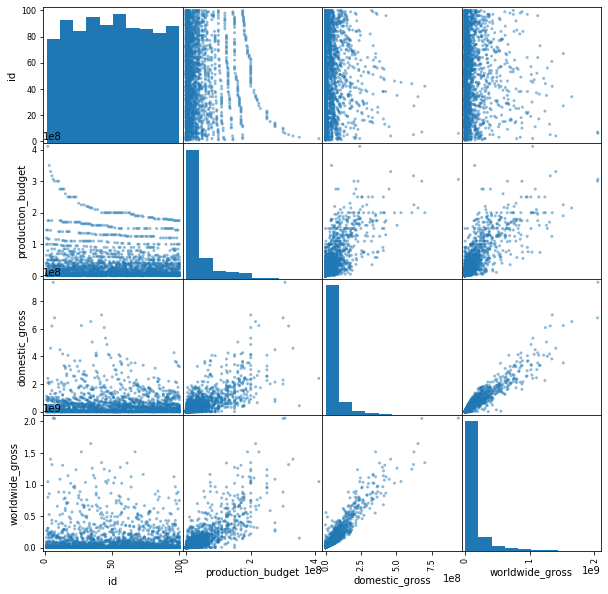

In [43]:
#look at the correlation between domestic gross, production budget, and worldwide gross
plt.rcParams["figure.figsize"]=10,10
pd.plotting.scatter_matrix(df8);

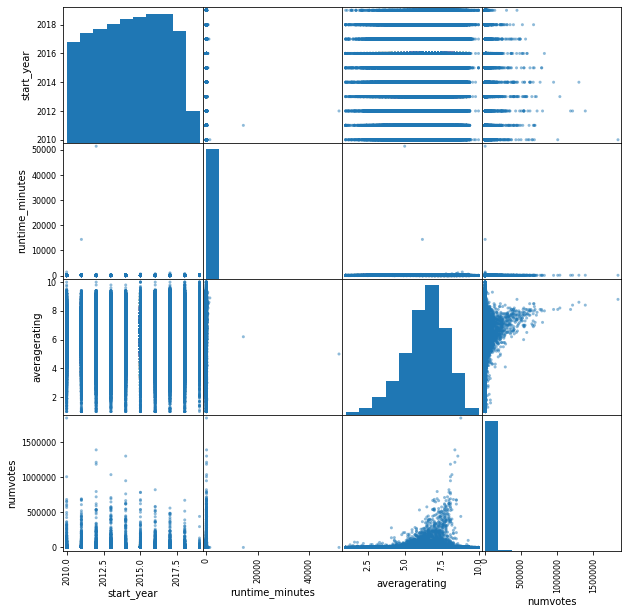

In [44]:
#Look at correlation columns in avrate_df
plt.rcParams["figure.figsize"]=10,10
pd.plotting.scatter_matrix(avrate_df);

###  Question 1: Which studios produced the movies with the highest gross from 2010-present (domestically and worldwide)?

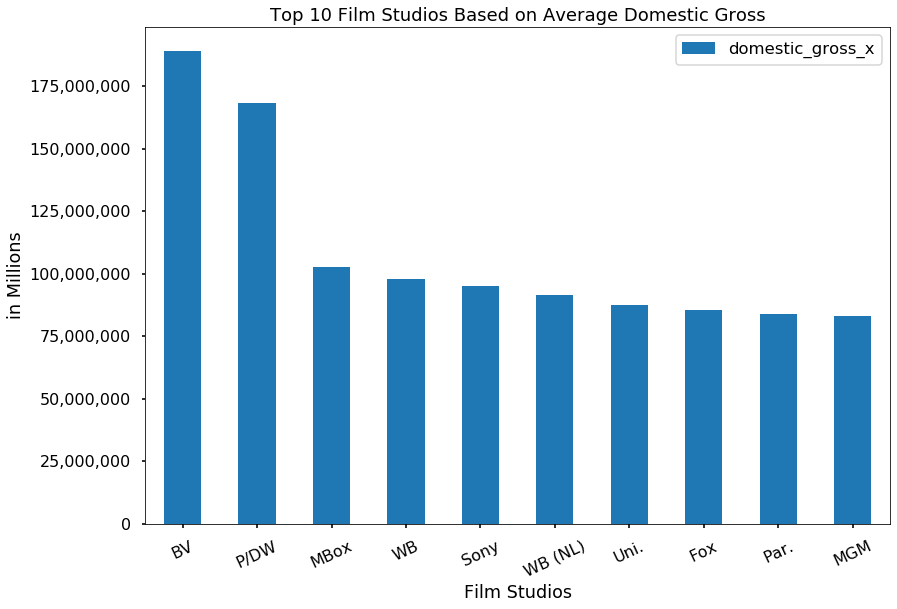

In [45]:
#Import again just to be sure
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')
import matplotlib.ticker as ticker

#New dataframe for plotting
new_df = df_big.groupby('studio').mean()
new_df.sort_values('domestic_gross_x',ascending=False, inplace=True)

#bar plot and format
new_df.reset_index(inplace=True)
fig, ax = plt.subplots()
sns.set_context('talk')
new_df.head(10).plot(x='studio', y='domestic_gross_x', kind='bar', title='Average Domestic Gross for Film Studios', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Labels and layout
plt.title('Top 10 Film Studios Based on Average Domestic Gross')
plt.xlabel('Film Studios')
plt.ylabel('in Millions')
plt.xticks(rotation=25)
fig.tight_layout()


### Answer 1 Part 1: Domestic: The studios with the highest domestic gross: 
- Buena Vista
- Pixar/DreamWorks
- MBox
- Warner Brothers
- Sony
- Warner Brother (NewLine Cinema)
- Universal Studios
- Fox
- Paramount Pictures
- MGM

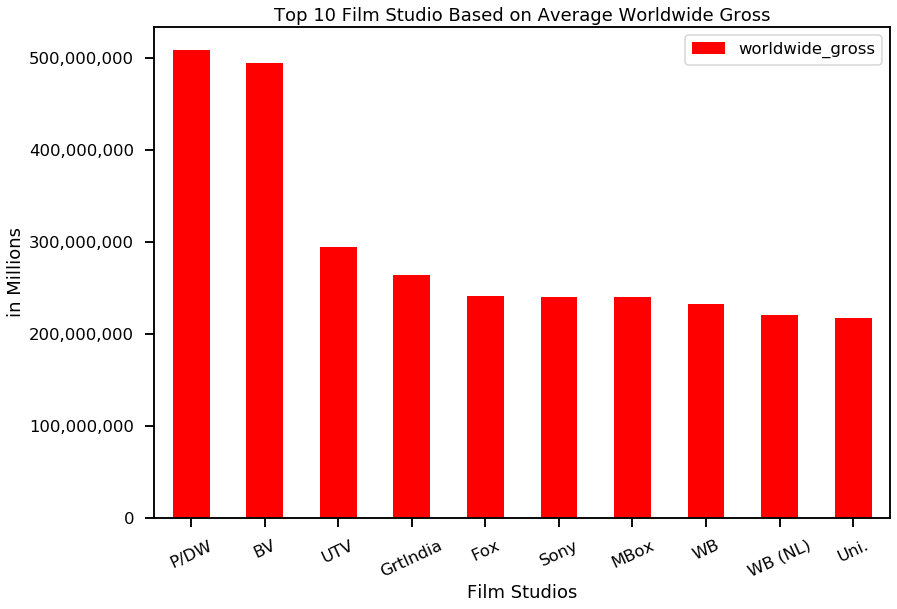

In [46]:
#New dataframe for plotting 
new_df2 = df_big.groupby('studio').mean()
new_df2.sort_values('worldwide_gross',ascending=False, inplace=True)

#Bar plot and format
new_df2.reset_index(inplace=True)
fig, ax = plt.subplots()
new_df2.head(10).plot(x='studio', y='worldwide_gross', kind='bar', title='Average Worldwide Gross for Film Studios', color='red', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Labels and layout
plt.title('Top 10 Film Studio Based on Average Worldwide Gross')
plt.xlabel('Film Studios')
plt.ylabel('in Millions')
plt.xticks(rotation=25)
fig.tight_layout()

### Answer 1 Part 2: Worldwide: The studios with the highest worldwide gross: 
- Pixar/Dreamworks
- Buena Vista
- UTV (Walt Disney India)
- GrtIndia 
- Fox
- Sony
- MBox
- Warner Brothers
- Warner Brother(NewLine Cinema)
- Universal Studios

### Question 2: What are the top grossing genres (domestically and internationally) and what was average gross of each genre?
    

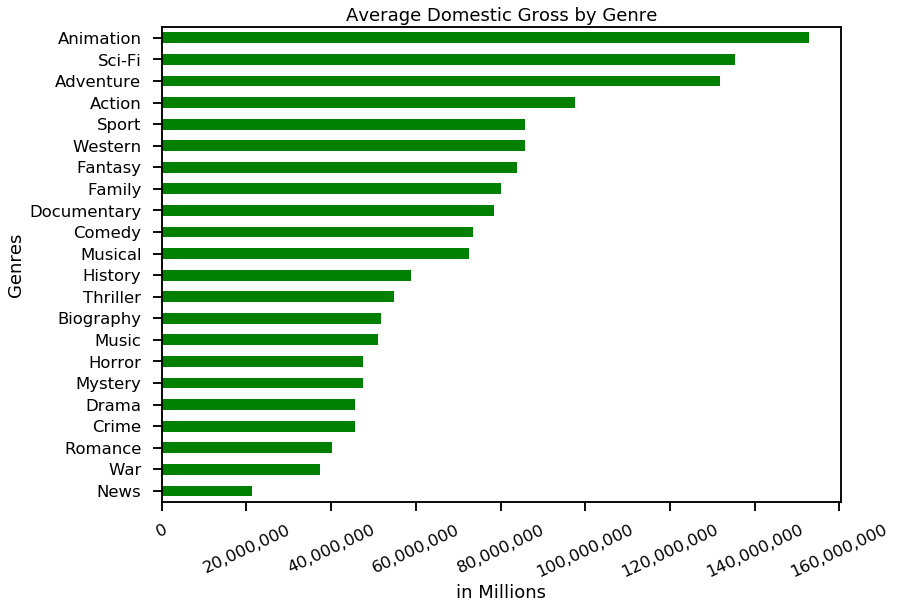

In [47]:
df_lst = []

for col in genre_list:
  df_lst.append(df_big[['domestic_gross_x', col]][df_big[col]==True])

dct = {}
for df in df_lst:
  dct[df.columns[-1]] = df['domestic_gross_x'].mean()


genres = pd.Series(dct)
genres.sort_values(inplace=True)
fig, ax = plt.subplots()
genres.plot(kind = 'barh', title = 'Average Domestic Gross by Genre', color='green', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Labels and layout
plt.title('Average Domestic Gross by Genre')
plt.xlabel('in Millions')
plt.ylabel('Genres')
plt.xticks(rotation=25)
fig.tight_layout()

### Answer 2 Part 1: Based on average domestic gross, the following at the top grossing domestic genres:
- Animation
- Sci-Fi
- Adventure
- Action
- Sport
- Western
- Fantasy
- Family
- Documentary
- Comedy



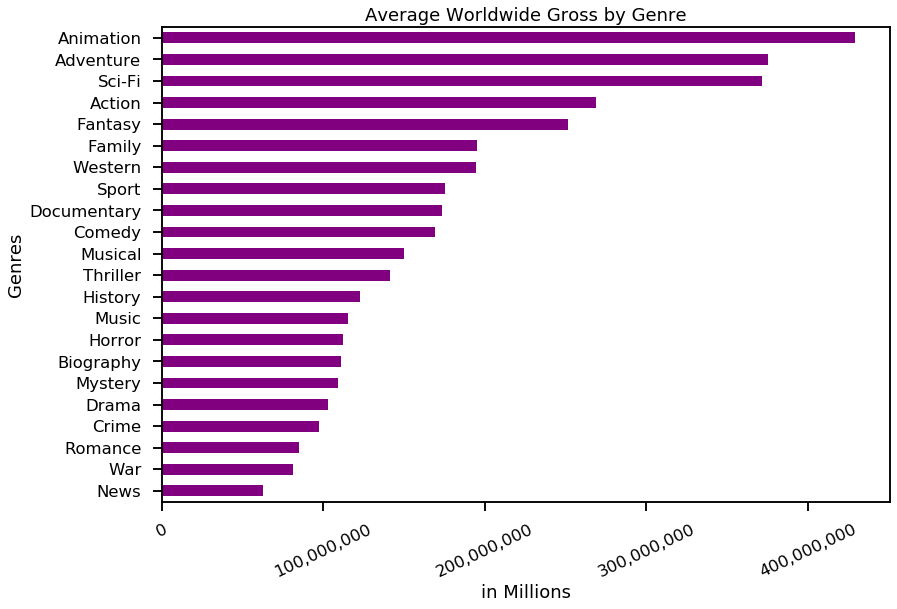

In [48]:
df_lst = []

for col in genre_list:
  df_lst.append(df_big[['worldwide_gross', col]][df_big[col]==True])

dct = {}
for df in df_lst:
  dct[df.columns[-1]] = df['worldwide_gross'].mean()

genres = pd.Series(dct)
genres.sort_values(inplace=True)
fig, ax = plt.subplots()
genres.plot(kind = 'barh', title = 'Average Worldwide Gross by Genre', color='purple', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('in Millions')
plt.ylabel('Genres')
plt.xticks(rotation=25)
fig.tight_layout()

### Answer 2 Part 2: Based on average worldwide gross, the following at the top grossing worldwide genres:
- Animation
- Adventure
- Sci-Fi
- Action
- Fantasy
- Family
- Western
- Sport
- Documentary
- Comedy


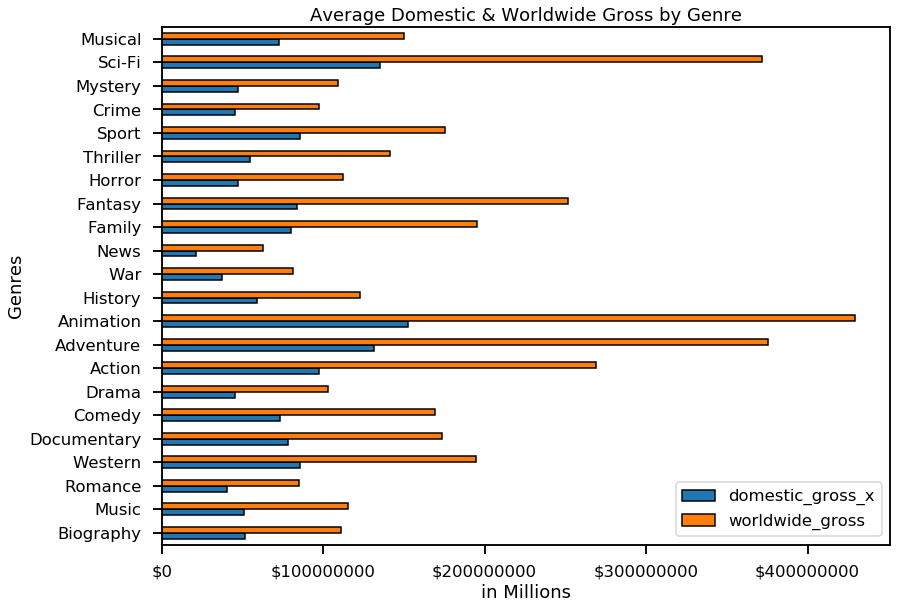

In [49]:
#Make for loop to loop genres
genres_dct = {}
for col in genre_list:
  q = df_big[['domestic_gross_x', 'worldwide_gross', col]][df_big[col]==True]
  dct[q.columns[-1]] = [q['domestic_gross_x'].mean(),q['worldwide_gross'].mean()]

#Grouped bar chart
genres = pd.DataFrame(dct).transpose()
genres.reset_index(inplace=True)
fig, ax = plt.subplots()
genres.columns = ['genre', 'domestic_gross_x', 'worldwide_gross']
genres.plot(x='genre', y=['domestic_gross_x', 'worldwide_gross'], kind='barh',edgecolor='black',ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(formatter)

#Labels and layouts
plt.title('Average Domestic & Worldwide Gross by Genre')
plt.xlabel('in Millions')
plt.ylabel('Genres')
fig.tight_layout()

### Answer 2 Part 3: The above chart(s) display the average gross of each genre.

### Question 3: Which movies had the highest production budgets from 2010-present? 

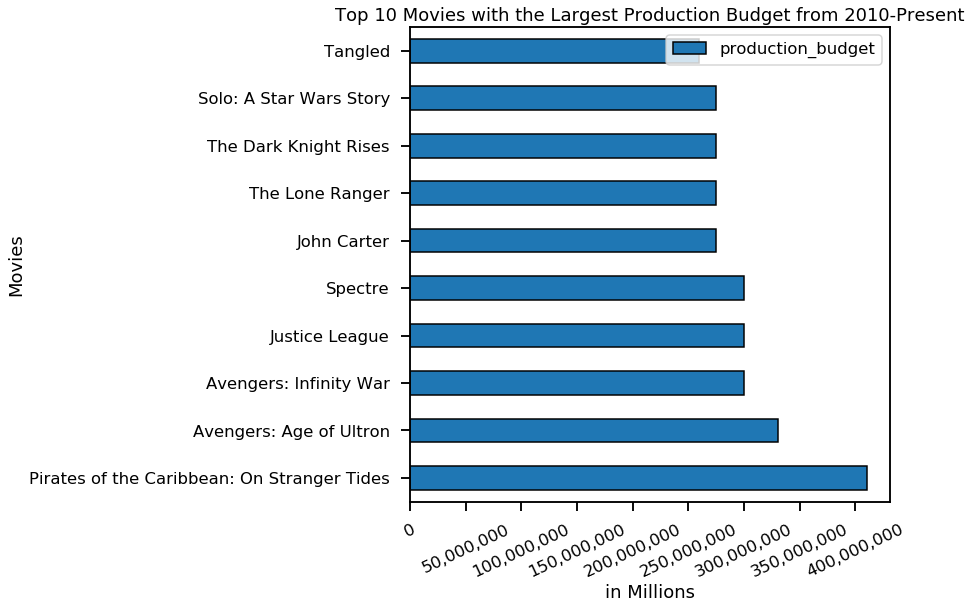

In [50]:
#New Dataframe for plot
new_df1 = df_big.groupby('movie').mean()
new_df1.sort_values('production_budget',ascending=False, inplace=True)

new_df1.reset_index(inplace=True)
fig, ax = plt.subplots()
new_df1.head(10).plot(x='movie', y='production_budget', kind='barh', title='Production Budget for Top 10 ',edgecolor='black', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Labels and layouts
plt.title('Top 10 Movies with the Largest Production Budget from 2010-Present')
plt.xlabel('in Millions')
plt.ylabel('Movies')
plt.xticks(rotation=25)
fig.tight_layout()

### Answer 3: The above chart displays the top 10 movies with the largest production budgets from 2010-present. 

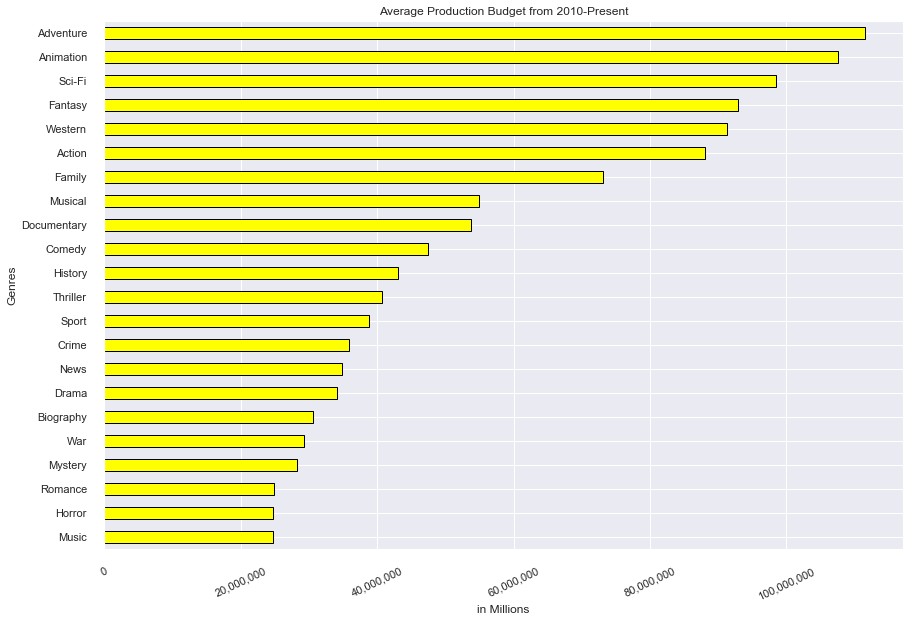

In [76]:
df_lst = []

for col in genre_list:
  df_lst.append(df_big[['production_budget', col]][df_big[col]==True])

dct = {}
for df in df_lst:
  dct[df.columns[-1]] = df['production_budget'].mean()

genres = pd.Series(dct)
genres.sort_values(inplace=True)
fig, ax = plt.subplots()
genres.plot(kind = 'barh', title = 'Average Production Budget by Genre', color='yellow', edgecolor='black', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Average Production Budget from 2010-Present')
plt.xlabel('in Millions')
plt.ylabel('Genres')
plt.xticks(rotation=25)
fig.tight_layout()

### The above chart shows us average production budget over the last 10 years by genre. You can see from here what you can expect to invest in your film for production. 

### Question 4: Which movies had the highest gross (domestic and worldwide)?

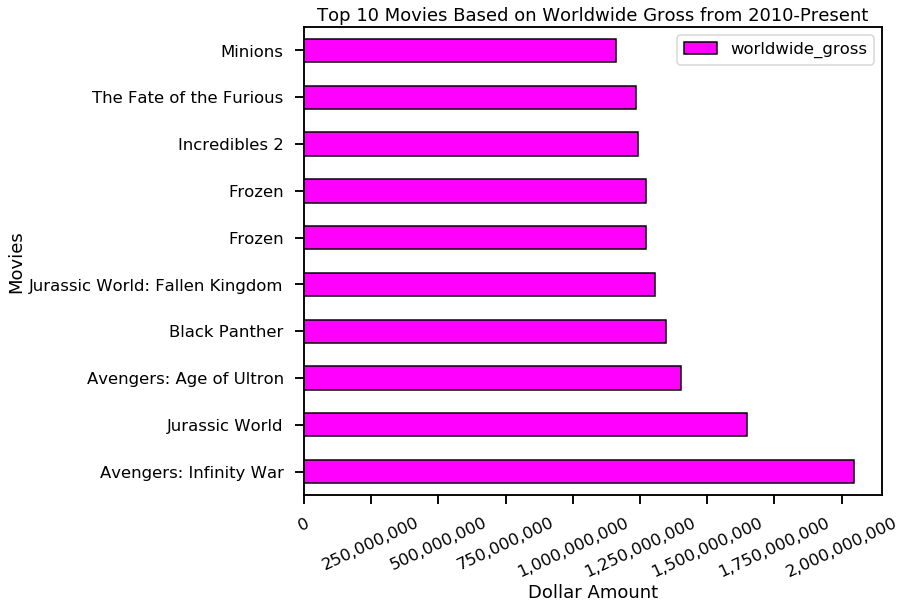

In [51]:
#New dataframe for plotting 
new_df3 = df_big.sort_values(by = 'worldwide_gross', ascending = False).head(10)
new_df3.reset_index(inplace=True)
fig, ax = plt.subplots()
new_df3.head(10).plot(x='movie', y='worldwide_gross', kind='barh', title='Gross for Top 10 ', color='magenta', edgecolor='black', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Labels and layout
plt.title('Top 10 Movies Based on Worldwide Gross from 2010-Present')
plt.xlabel('Dollar Amount')
plt.ylabel('Movies')
#Rotate x-axis for better look
plt.xticks(rotation=25)
fig.tight_layout()

### Answer 4 Part 1: The above chart captures top 10 movies based on worldwide gross from 2010-present. 

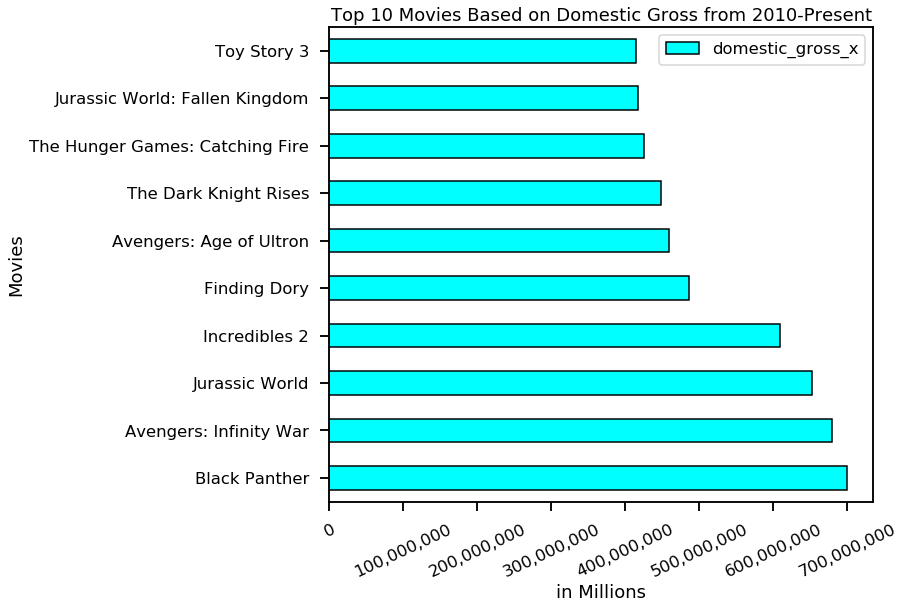

In [52]:
#New dataframe for plotting
new_df5 = df_big.sort_values(by = 'domestic_gross_x', ascending = False).head(10)
new_df5.reset_index(inplace=True)
fig, ax = plt.subplots()
new_df5.head(10).plot(x='movie', y='domestic_gross_x', kind='barh', title='Gross for Top 10 ', color='cyan', edgecolor='black', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Labels and layout
plt.title('Top 10 Movies Based on Domestic Gross from 2010-Present')
plt.xlabel('in Millions')
plt.ylabel('Movies')

#Rotate x-axis for a better look
plt.xticks(rotation=25)
fig.tight_layout()

### Answer 4 Part 2: The above chart captures top 10 movies based on domestic gross from 2010-present. 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


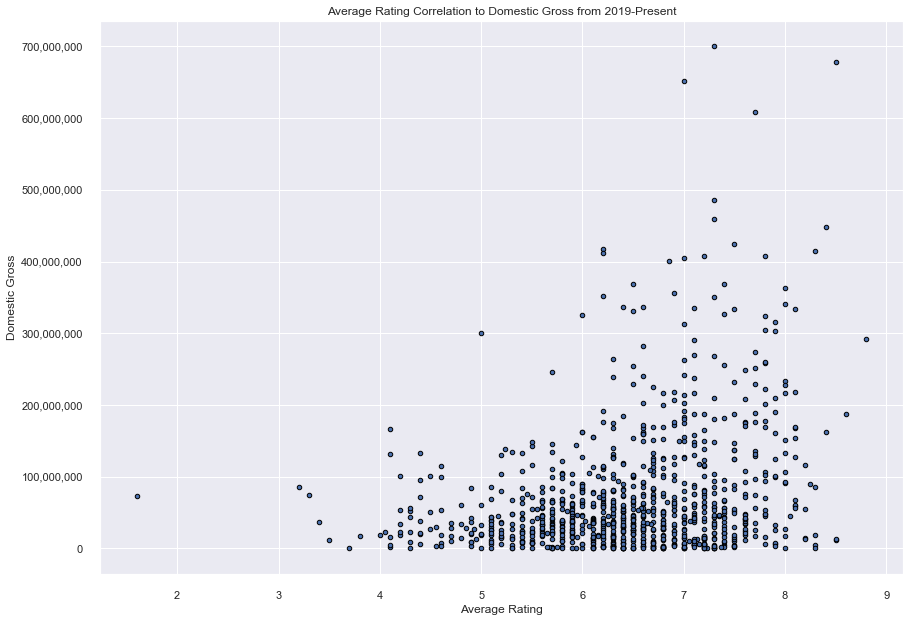

In [82]:
#Look at the correlation between average rating & domestic gross
#Look at the data
new_df7 = df_big.groupby('domestic_gross_x').mean()
new_df7.sort_values('averagerating',ascending=False, inplace=True)

# Reset index
new_df7.reset_index(inplace=True)

#Let's Plot
fig, ax = plt.subplots()
new_df7.plot(x='averagerating', y='domestic_gross_x', kind='scatter', title='Average Rating By Average Domestic Gross',edgecolor='black', ax=ax)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Average Rating Correlation to Domestic Gross from 2019-Present')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross')

#For a nicer layout
fig.tight_layout()


From the above scatter plot, we can see that higher gross does NOT mean higher average rating

# Conclusion

We have reviewed the top grossing studios, genres, and production budgets both domestically and internationally to follow the money.   In conclusion,   I suggest that you sincerely consider focusing on any the following genres:
- Animation 
- Action 
- Sci-Fi 
- Adventure 

Based on my research it is evident that as a new production studio, these genres are like to yield the most profit domestically and internationally. It is easy to get excited about the films that have yielded the most gross domestically and internationally; however, please keep in mind that these genres will also require a substantial production budget. Lastly, keep in mind that having a highly profitable movies does not have a direct correlation to high ratings.